In [ ]:
# pascal voc 2012 데이터를 다운로드 후 /content/data 디렉토리에 압축 해제
!mkdir ./data

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

In [6]:
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head

2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg
2007_000061.jpg
2007_000063.jpg
2007_000068.jpg
2007_000121.jpg
2007_000123.jpg


In [33]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import xml.etree.ElementTree as ET

%matplotlib inline

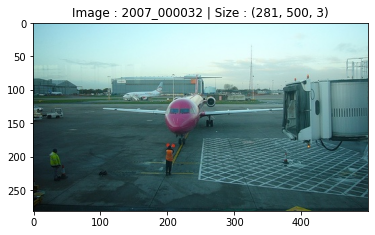

In [32]:
default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.title("Image : {} | Size : {}".format('2007_000032', img_rgb.shape))
plt.imshow(img_rgb)
plt.show()

In [29]:
! cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

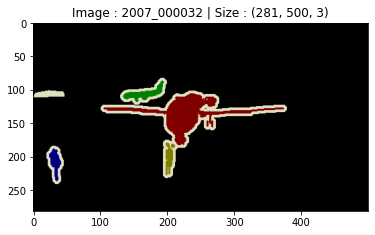

In [31]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.title("Image : {} | Size : {}".format('2007_000032', img_rgb.shape))
plt.imshow(img_rgb)
plt.show()

### Anotation xml을 파싱해 접근하기

In [44]:
VOC_ROOT_DIR = '/content/data/VOCdevkit/VOC2012/'

ANNO_DIR = os.path.join(VOC_ROOT_DIR, 'Annotations')
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, 'JPEGImages')

xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5])
print(len(xml_files))

['2010_006395.xml', '2010_002037.xml', '2012_002956.xml', '2010_005943.xml', '2010_004738.xml']
17125


In [52]:
xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

objects_list = []
for obj in root.findall('object'):
  obj_box = obj.find('bndbox')

  x1 = int(obj_box.find('xmin').text)
  y1 = int(obj_box.find('ymin').text)
  x2 = int(obj_box.find('xmax').text)
  y2 = int(obj_box.find('ymax').text)

  bound_box = (x1,y1,x2,y2)
  class_name = obj.find('name').text
  object_dict = {
      'class_name': class_name,
      'bound_box': bound_box
      }
  objects_list.append(object_dict)
  
print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

full_image_name: /content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)


In [53]:
for obj in objects_list:
  print(obj)

{'class_name': 'aeroplane', 'bound_box': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bound_box': (133, 88, 197, 123)}
{'class_name': 'person', 'bound_box': (195, 180, 213, 229)}
{'class_name': 'person', 'bound_box': (26, 189, 44, 238)}


### Practice

In [65]:
!cat '/content/data/VOCdevkit/VOC2012/Annotations/2011_002879.xml'

<annotation>
	<filename>2011_002879.jpg</filename>
	<folder>VOC2012</folder>
	<object>
		<name>sofa</name>
		<bndbox>
			<xmax>56</xmax>
			<xmin>1</xmin>
			<ymax>375</ymax>
			<ymin>214</ymin>
		</bndbox>
		<difficult>1</difficult>
		<occluded>0</occluded>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
	</object>
	<object>
		<name>tvmonitor</name>
		<bndbox>
			<xmax>330</xmax>
			<xmin>171</xmin>
			<ymax>239</ymax>
			<ymin>125</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Frontal</pose>
		<truncated>0</truncated>
	</object>
	<segmented>1</segmented>
	<size>
		<depth>3</depth>
		<height>375</height>
		<width>500</width>
	</size>
	<source>
		<annotation>PASCAL VOC2011</annotation>
		<database>The VOC2011 Database</database>
		<image>flickr</image>
	</source>
</annotation>


In [81]:
DEFAULT_DIR = '/content/data/VOCdevkit/VOC2012/'
ANNO_DIR = os.path.join(DEFAULT_DIR, 'Annotations/2011_002879.xml')
IMAGE_DIR = os.path.join(DEFAULT_DIR, 'JPEGImages/2011_002879.jpg')

In [82]:
tree = ET.parse(ANNO_DIR)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(DEFAULT_DIR, 'JPEGImages/', image_name)

img = cv2.imread(full_image_name)
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)


objects = root.findall('object')
objects_list = []

for obj in objects:
  obj_name = obj.find('name').text

  bndbox = obj.find('bndbox')

  x1 = int(bndbox.find('xmin').text)
  y1 = int(bndbox.find('ymin').text)
  x2 = int(bndbox.find('xmax').text)
  y2 = int(bndbox.find('ymax').text)
  obj_boundbox = (x1,y1,x2,y2)
  object_dict = {'obj_name': obj_name,
                 'obj_boundbox': obj_boundbox}
  objects_list.append(object_dict)

print("FILE DIR : {} \nSIZE : ({},{})".format(full_image_name,img_width,img_height))
for obj in objects_list:
  print(obj)

FILE DIR : /content/data/VOCdevkit/VOC2012/JPEGImages/2011_002879.jpg 
SIZE : (500,375)
{'obj_name': 'sofa', 'obj_boundbox': (1, 214, 56, 375)}
{'obj_name': 'tvmonitor', 'obj_boundbox': (171, 125, 330, 239)}


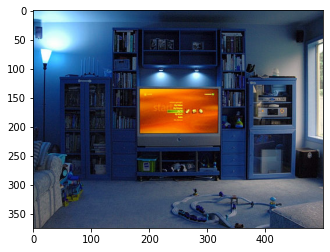

In [83]:
plt.imshow(img)
plt.show()

1 214 56 375
171 125 330 239


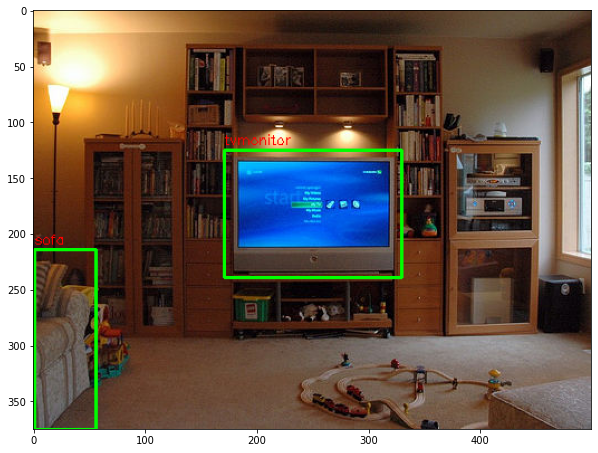

In [97]:
img_copy = img.copy()

green_color = (0,255,0)
red_color = (0,0,255)

for obj in objects_list:
  obj_name = obj['obj_name']
  
  obj_boundbox = obj['obj_boundbox']
  x1,y1,x2,y2 = obj_boundbox
  print(x1,y1,x2,y2)
  cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=green_color, thickness=2)
  cv2.putText(img_copy, obj_name, (x1,y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_copy_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_copy_rgb)
plt.show()